In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv("TESLA.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
...,...,...,...,...,...,...,...
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800


In [5]:
data = df[['Open','High','Low','Close','Adj Close']]

In [6]:
data

,Open,High,Low,Close,Adj Close
0,259.933319,264.500000,256.893341,260.436676,260.436676
1,260.333344,263.043335,258.333344,258.493347,258.493347
2,259.466675,260.260010,254.529999,258.406677,258.406677
3,265.500000,268.989990,258.706665,260.510010,260.510010
4,261.600006,265.769989,258.066681,260.196655,260.196655
...,...,...,...,...,...
248,283.089996,284.500000,272.820007,275.329987,275.329987
249,271.829987,284.089996,270.309998,276.010010,276.010010
250,283.839996,288.670013,277.510010,282.940002,282.940002
251,283.079987,289.000000,277.570007,287.809998,287.809998


In [7]:
#checking missing values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
dtypes: float64(5)
memory usage: 10.0 KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,300.136008,307.486021,292.114058,299.709104,299.709104
std,46.139272,46.789896,44.685331,45.788283,45.788283
min,207.949997,217.973328,206.856674,209.386673,209.386673
25%,266.513336,273.166656,260.723328,266.923340,266.923340
50%,298.500000,303.709991,289.130005,296.666656,296.666656
75%,335.600006,344.950012,327.510010,336.336670,336.336670
max,411.470001,414.496674,405.666656,409.970001,409.970001


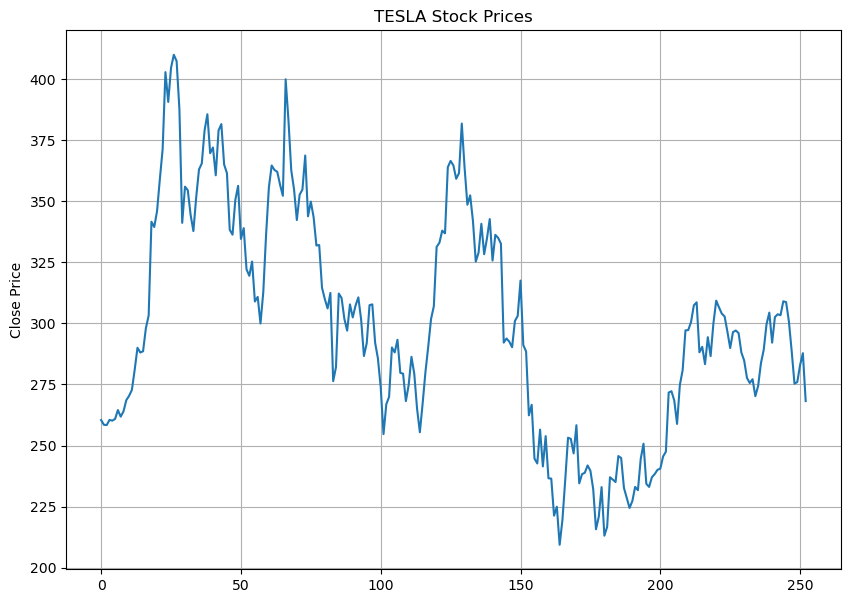

In [10]:
data['Close'].plot(figsize=(10,7), title="TESLA Stock Prices")
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

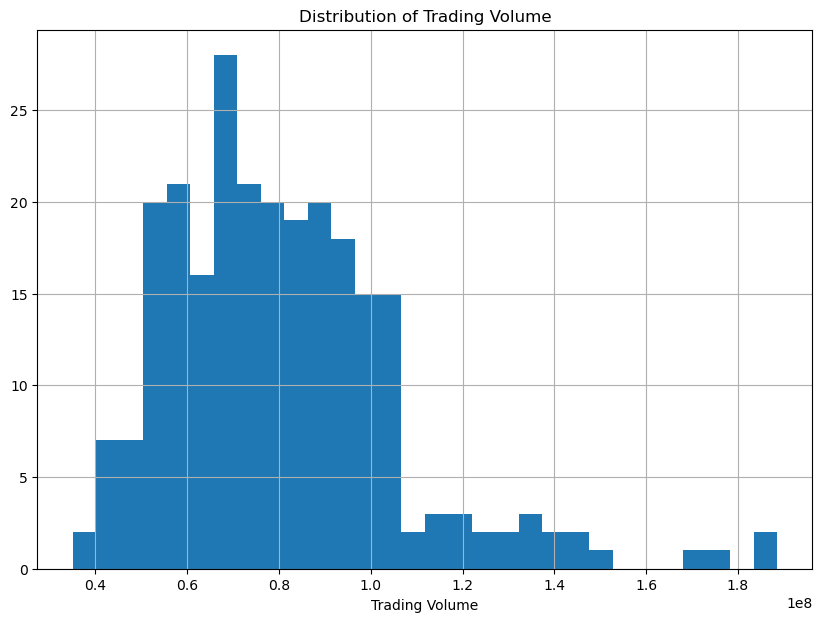

In [11]:
df['Volume'].hist(figsize=(10,7), bins=30)
plt.title("Distribution of Trading Volume")
plt.xlabel('Trading Volume')
plt.grid(True)
plt.show()

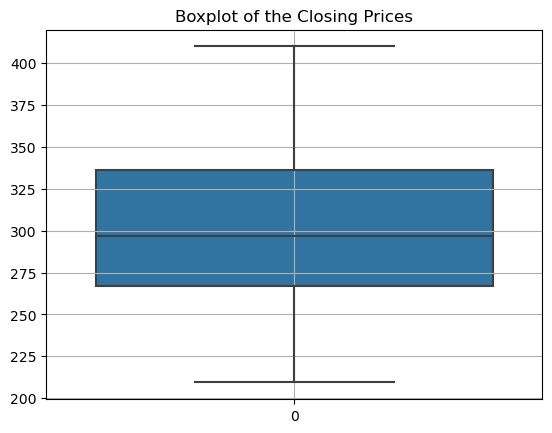

In [12]:
sns.boxplot(data['Close']).set_title("Boxplot of the Closing Prices")
plt.grid(True)
plt.show()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to DateTime
data.set_index(df['Date'], inplace=True)

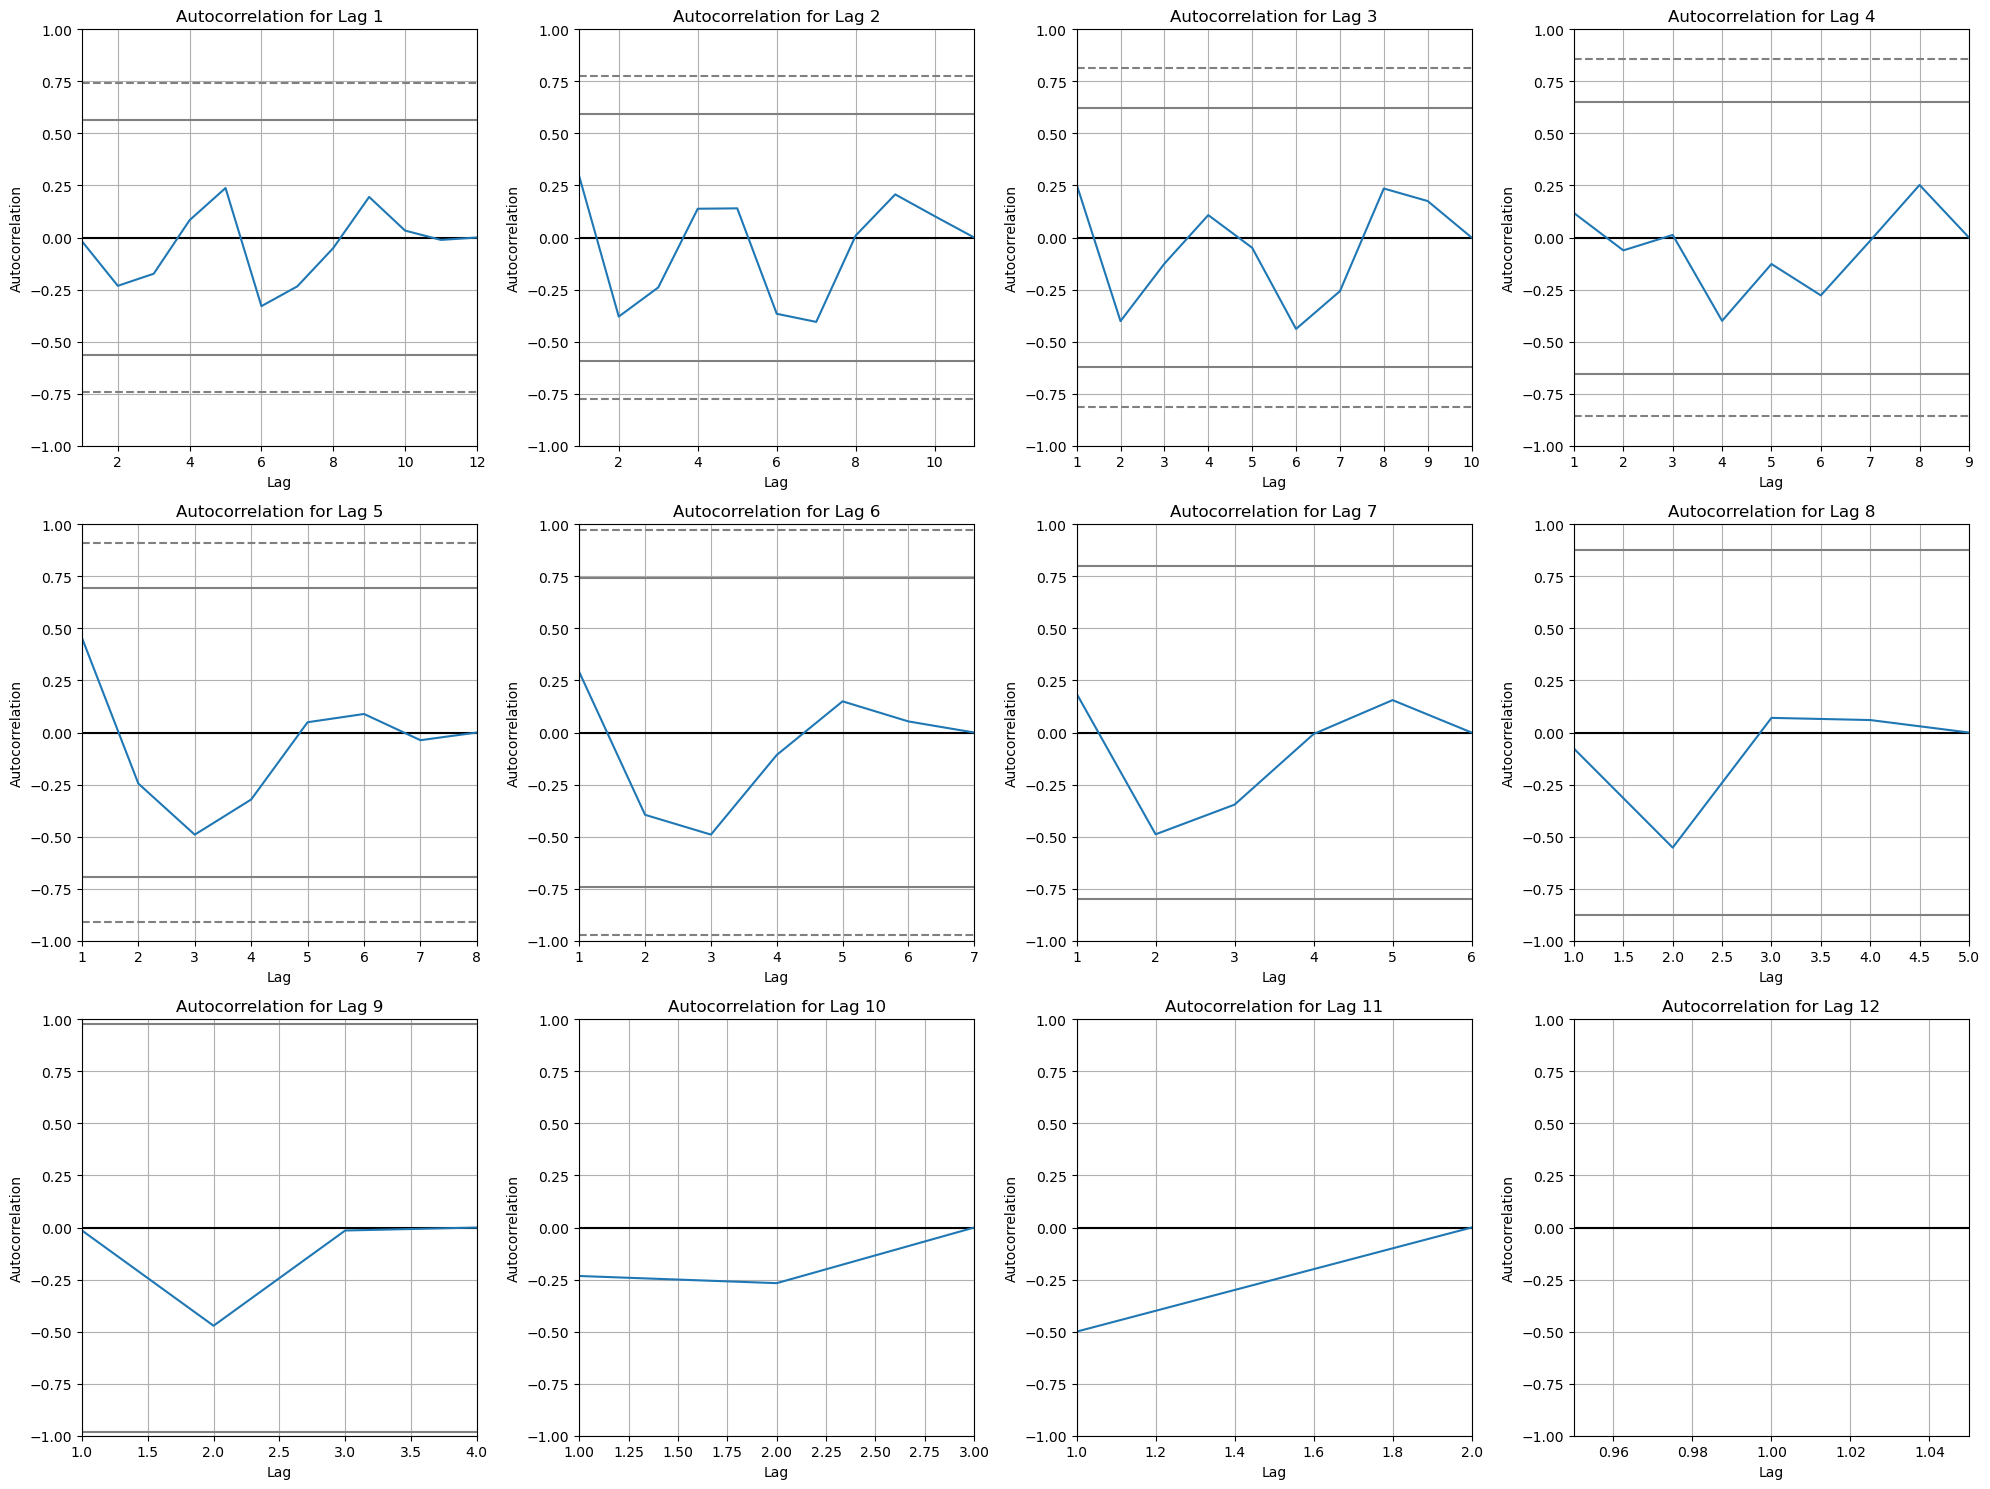

In [14]:
# Autocorrelation plot for lags up to 12 months
# This will be helpful to understand if the past months' data is correlated with the future months' data
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

for i in range(12):
    plt.subplot(3, 4, i+1)
    pd.plotting.autocorrelation_plot(data['Close'].resample('M').mean().diff(periods=i+1).dropna())
    plt.title(f"Autocorrelation for Lag {i+1}")
plt.tight_layout()
plt.show()

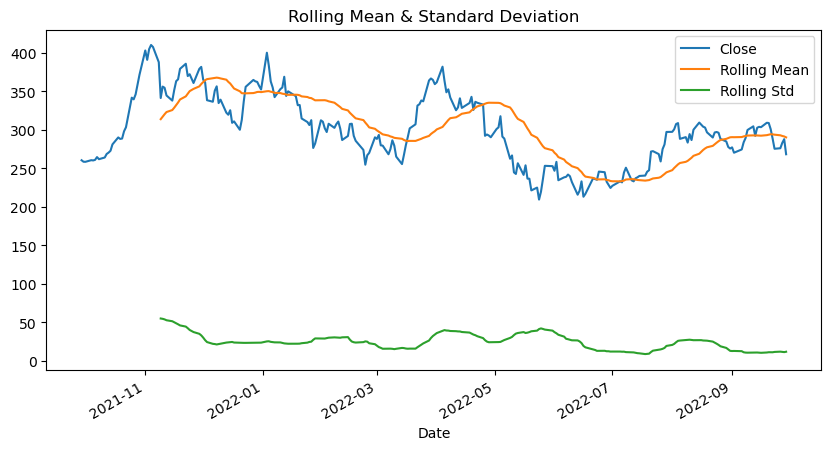

In [15]:
data['Rolling Mean'] = data['Close'].rolling(window=30).mean()
data['Rolling Std'] = data['Close'].rolling(window=30).std()
data[['Close','Rolling Mean','Rolling Std']].plot(figsize=(10,5)).set_title('Rolling Mean & Standard Deviation')
plt.show()

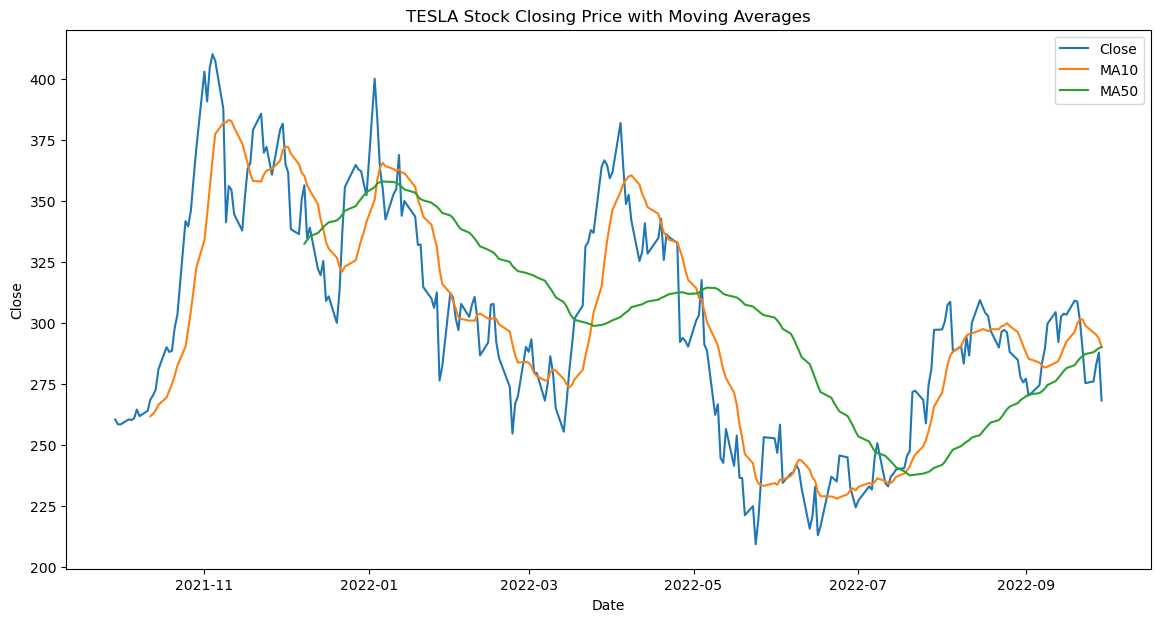

In [16]:
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()
plt.figure(figsize=(14,7))
sns.lineplot(data = data, x = "Date", y = "Close", label = 'Close')
sns.lineplot(data = data, x = "Date", y = "MA10", label = 'MA10')
sns.lineplot(data = data, x = "Date", y = "MA50", label = 'MA50')
plt.title('TESLA Stock Closing Price with Moving Averages')
plt.show()

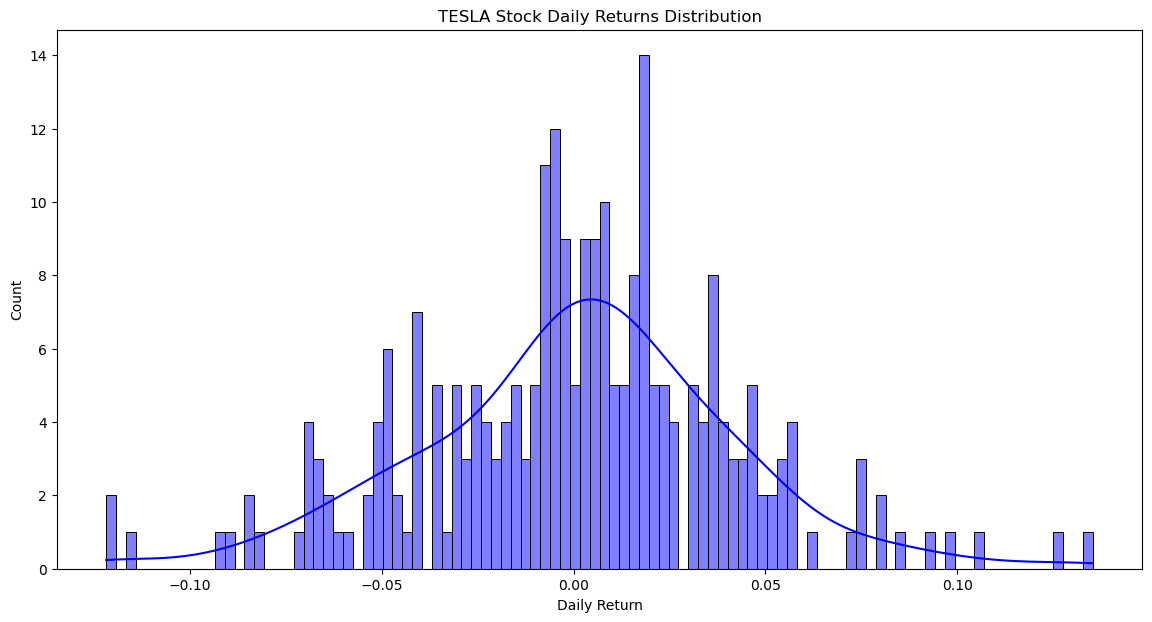

In [17]:
data['Daily Return'] = data['Close'].pct_change()
plt.figure(figsize=(14,7))
sns.histplot(data = data, x = "Daily Return", bins = 100, kde = True, color = 'blue')
plt.title('TESLA Stock Daily Returns Distribution')
plt.show()

In [18]:
data.drop(['Rolling Mean', 'Rolling Std', 'Daily Return', 'MA10','MA50'], axis =1 , inplace = True)


In [19]:
data

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655
...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002


In [20]:
train = data.astype(float)

In [21]:
train

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655
...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002


<Axes: xlabel='Date'>

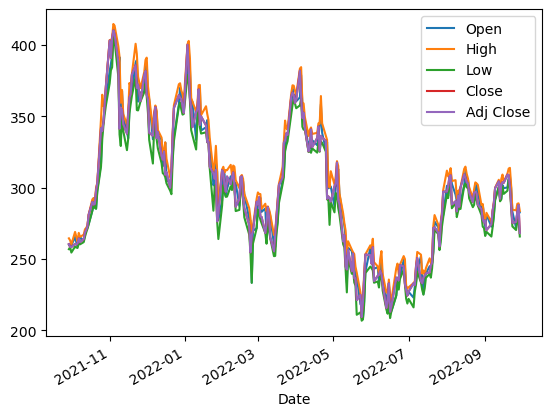

In [22]:
data.plot.line()

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


data = df['Close'].values
data = data.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data.reshape(-1, 1))


In [24]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [25]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)


Epoch 1/20
191/191 - 9s - loss: 0.1823 - 9s/epoch - 48ms/step
Epoch 2/20
191/191 - 1s - loss: 0.0273 - 968ms/epoch - 5ms/step
Epoch 3/20
191/191 - 1s - loss: 0.0234 - 1s/epoch - 5ms/step
Epoch 4/20
191/191 - 1s - loss: 0.0200 - 1s/epoch - 6ms/step
Epoch 5/20
191/191 - 1s - loss: 0.0178 - 998ms/epoch - 5ms/step
Epoch 6/20
191/191 - 1s - loss: 0.0162 - 961ms/epoch - 5ms/step
Epoch 7/20
191/191 - 1s - loss: 0.0144 - 1s/epoch - 5ms/step
Epoch 8/20
191/191 - 1s - loss: 0.0129 - 895ms/epoch - 5ms/step
Epoch 9/20
191/191 - 1s - loss: 0.0118 - 1s/epoch - 5ms/step
Epoch 10/20
191/191 - 1s - loss: 0.0109 - 949ms/epoch - 5ms/step
Epoch 11/20
191/191 - 1s - loss: 0.0096 - 1s/epoch - 5ms/step
Epoch 12/20
191/191 - 1s - loss: 0.0092 - 977ms/epoch - 5ms/step
Epoch 13/20
191/191 - 1s - loss: 0.0084 - 993ms/epoch - 5ms/step
Epoch 14/20
191/191 - 1s - loss: 0.0080 - 891ms/epoch - 5ms/step
Epoch 15/20
191/191 - 1s - loss: 0.0077 - 975ms/epoch - 5ms/step
Epoch 16/20
191/191 - 1s - loss: 0.0077 - 934ms/epo

In [26]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 4ms/step


In [27]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [28]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


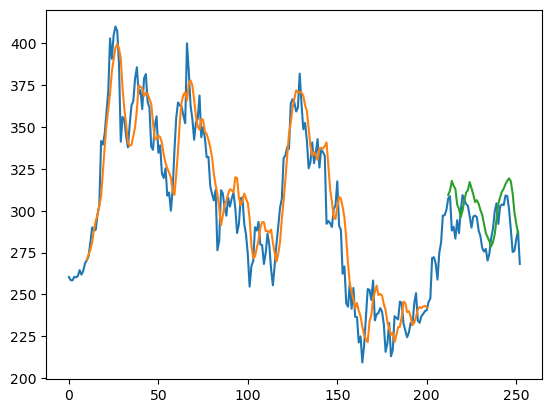

In [29]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
scaler = StandardScaler()


In [32]:
data_reshaped = data.reshape(-1, 1)
data_scaled = scaler.fit_transform(data_reshaped)

In [33]:
data_scaled

array([[-8.59396100e-01],
       [-9.01921809e-01],
       [-9.03818429e-01],
       [-8.57791305e-01],
       [-8.64648461e-01],
       [-8.48892689e-01],
       [-7.69675910e-01],
       [-8.28906357e-01],
       [-7.81857491e-01],
       [-6.81342125e-01],
       [-6.42244935e-01],
       [-5.89433551e-01],
       [-4.09191132e-01],
       [-2.11660996e-01],
       [-2.54260212e-01],
       [-2.43099689e-01],
       [-3.74002159e-02],
       [ 7.69743323e-02],
       [ 9.17133451e-01],
       [ 8.70230854e-01],
       [ 1.01195979e+00],
       [ 1.29775083e+00],
       [ 1.56734872e+00],
       [ 2.25731778e+00],
       [ 1.99041843e+00],
       [ 2.29575849e+00],
       [ 2.41283226e+00],
       [ 2.35579109e+00],
       [ 1.92433226e+00],
       [ 9.07213092e-01],
       [ 1.23144555e+00],
       [ 1.19905865e+00],
       [ 9.79572773e-01],
       [ 8.33467722e-01],
       [ 1.13501453e+00],
       [ 1.38506365e+00],
       [ 1.43882251e+00],
       [ 1.73555517e+00],
       [ 1.8

In [34]:
X_train = []
Y_train = []

In [35]:
x_future = 1   
x_past = 19


for i in range(x_past, len(data_scaled) - x_future +1):
    X_train.append(data_scaled[i - x_past:i, 0:data_scaled.shape[1]])
    Y_train.append(data_scaled[i + x_future - 1:i + x_future, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

print('x_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(Y_train.shape))

x_train shape == (234, 19, 1).
y_train shape == (234, 1).


In [36]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 19, 64)            16896     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
14/14 [==============================] - 15s 191ms/step - loss: 1.0777 - val_loss: 0.1379
Epoch 2/5
14/14 [==============================] - 1s 55ms/step - loss: 0.6702 - val_loss: 0.1367
Epoch 3/5
14/14 [==============================] - 1s 61ms/step - loss: 0.4617 - val_loss: 0.1376
Epoch 4/5
14/14 [==============================] - 1s 56ms/step - loss: 0.4003 - val_loss: 0.1533
Epoch 5/5
14/14 [==============================] - 1s 49ms/step - loss: 0.3347 - val_loss: 0.1265


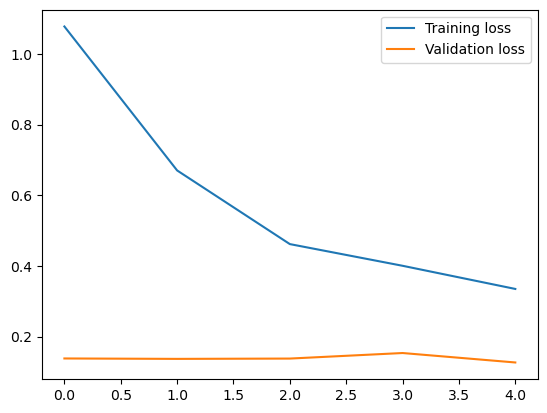

In [37]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [39]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [40]:
x_past = 16
x_days_for_prediction=20

In [41]:
dates = pd.to_datetime(df['Date'])

In [42]:
predict_dates = pd.date_range(list(dates)[-x_past], periods=x_days_for_prediction, freq=us_bd).tolist()
print(predict_dates)

[Timestamp('2022-09-08 00:00:00', freq='C'), Timestamp('2022-09-09 00:00:00', freq='C'), Timestamp('2022-09-12 00:00:00', freq='C'), Timestamp('2022-09-13 00:00:00', freq='C'), Timestamp('2022-09-14 00:00:00', freq='C'), Timestamp('2022-09-15 00:00:00', freq='C'), Timestamp('2022-09-16 00:00:00', freq='C'), Timestamp('2022-09-19 00:00:00', freq='C'), Timestamp('2022-09-20 00:00:00', freq='C'), Timestamp('2022-09-21 00:00:00', freq='C'), Timestamp('2022-09-22 00:00:00', freq='C'), Timestamp('2022-09-23 00:00:00', freq='C'), Timestamp('2022-09-26 00:00:00', freq='C'), Timestamp('2022-09-27 00:00:00', freq='C'), Timestamp('2022-09-28 00:00:00', freq='C'), Timestamp('2022-09-29 00:00:00', freq='C'), Timestamp('2022-09-30 00:00:00', freq='C'), Timestamp('2022-10-03 00:00:00', freq='C'), Timestamp('2022-10-04 00:00:00', freq='C'), Timestamp('2022-10-05 00:00:00', freq='C')]


In [43]:
prediction = model.predict(X_train[-x_days_for_prediction:])

1/1 [==============================] - 1s 1s/step


In [47]:
# Fit the scaler to your data
scaler.fit(data)  # Assuming 'data' is the data you want to scale

# Now you can perform the inverse transform
y_pred_future = scaler.inverse_transform(prediction_copies)[:, 0]

In [49]:
forecast_dates = []
for time_i in predict_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2023-5-1']
original

,Date,Open


<Axes: xlabel='Date', ylabel='Open'>

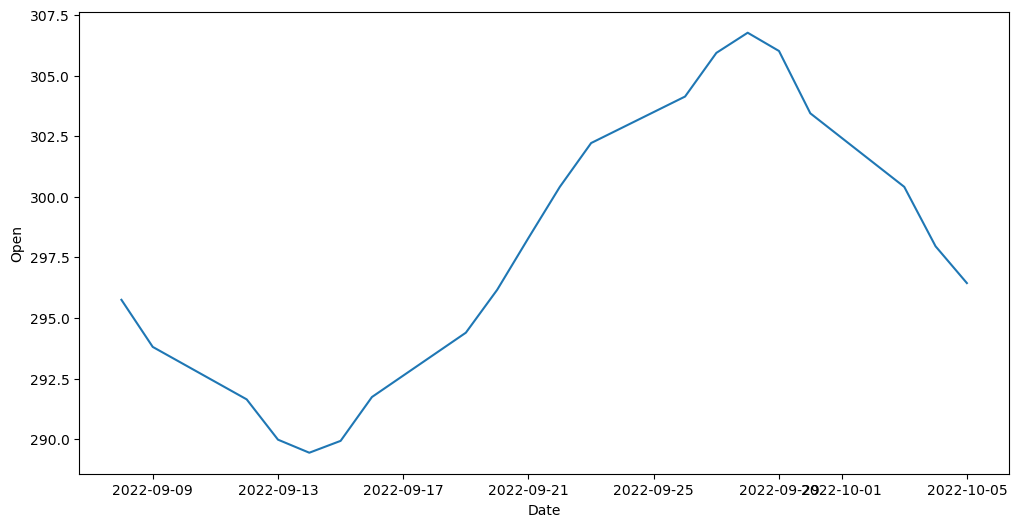

In [50]:
# sns.lineplot(x=original['Date'], y=original['Open'])
plt.figure(figsize=(12,6))
sns.lineplot(x=df_forecast['Date'], y=df_forecast['Open'])